# Deliverable 2: Project Proposal


# __Introduction__
Heart disease is a global health concern encompassing conditions affecting the heart and blood vessels. High cholesterol levels, defined as >=240mg/dL (Johns Hopkins Medicine, 2020), are a recognized risk factor associated with heart disease. 
Cholesterol is a fatty substance found in our cells and diet that is crucial in cellular functions and hormone production. However, elevated cholesterol levels can lead to plaque buildup in arteries, constraining blood flow and raising the risk of heart-related issues. In recent years, heart disease has witnessed a substantial rise in fatalities, with a surge of over 2 million deaths since 2000, reaching 8.9 million deaths by 2019 (WHO, 2020). Maintaining healthy cholesterol levels is imperative for mitigating the risk of heart disease, highlighting the importance of monitoring and managing cholesterol levels.
<br><br>
#### __Research question__
Is there a significant difference in the proportions of patients diagnosed with heart disease between those with high cholesterol levels and those with normal or below-average cholesterol levels?
<br><br>
#### __Choice of parameter__
Location parameter: Mean  
-  By comparing the means of the two groups, we can assess whether there is a noticeable difference in the average diagnosis proportions.

Scale parameter: Standard Deviation
-  A significant difference might not only be reflected in the mean but also in the spread of diagnosis proportions within the groups.
<br><br>
#### __Dataset description__
We will use the Heart Disease dataset from the UC Irvine Machine Learning Repository. It has 14 attributes measured across three geographic samples. We will use a subset of the original dataset, namely the age, cholesterol levels measured in milligrams per deciliter of blood (mg/dl), and diagnosis for patients from Cleveland. 
<br><br><br><br>

# Preliminary Results


In [1]:
# import libraries
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


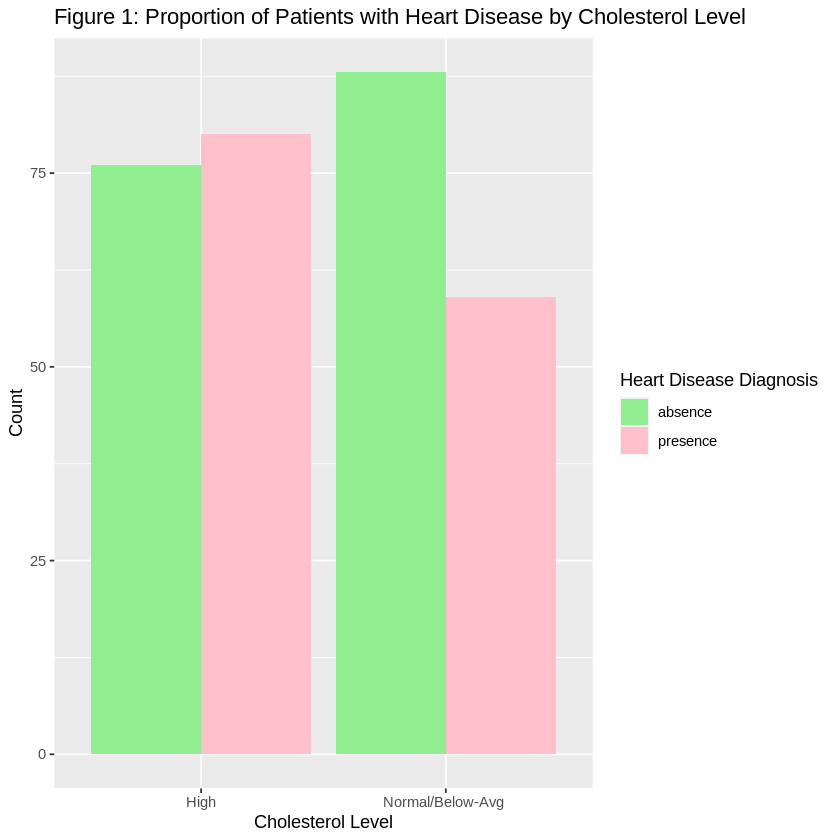

In [2]:
# STEP 1: Read the data from the web 
data <- read.table("https://raw.githubusercontent.com/Kaylan-W/STAT-201-Final-Project/main/data/processed.cleveland.data", 
                   sep = ",", header = FALSE, na.strings = "?")
 
# Assign column names to the dataframe
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")


# STEP 2: Clean and wrangle data
# Tidy target column by combining values to make a binary feature
mutate_num <- data %>%
    mutate(diagnosis = case_when(num == 0 ~ "absence",
                                 num == 1 ~ "presence",
                                 num == 2 ~ "presence",
                                 num == 3 ~ "presence",
                                 num == 4 ~ "presence"))

# If chol is greater than or equal to 240, it is classified as high cholesterol 
threshold = 240

# Turn chol into a categorical variable with the categories "High Chol" and "Normal/Below-Avg Chol"
mutate_chol <- mutate_num %>%
    mutate(chol_level = case_when(chol >=  threshold ~ "High",
                                  chol < threshold ~ "Normal/Below-Avg "))


# Select relevant columns and handle NA values. 
data_downsized<- mutate_chol %>%
        select(age, chol, chol_level, diagnosis, -num) %>%
        na.omit()

# head(data_downsized)

# STEP 3: Create a bar chart
ggplot(data_downsized, aes(x = chol_level, fill = diagnosis)) +
  geom_bar(position = "dodge") +
  labs(title = "Figure 1: Proportion of Patients with Heart Disease by Cholesterol Level",
       x = "Cholesterol Level",
       y = "Count",
       fill = "Heart Disease Diagnosis") +
  scale_fill_manual(values = c("absence" = "lightgreen", "presence" = "pink"))

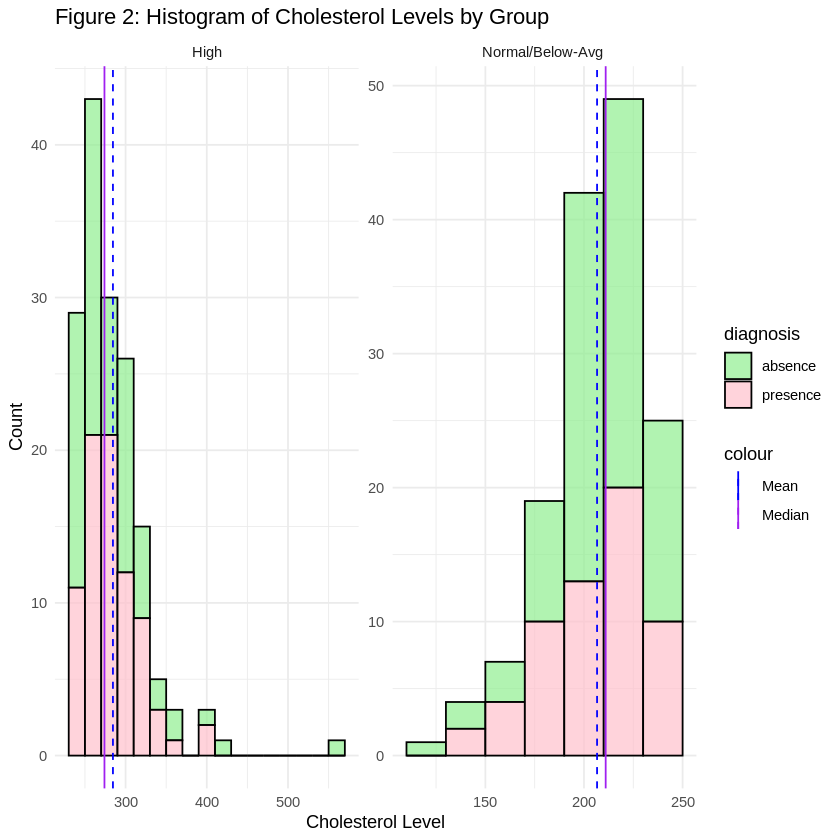

In [3]:
#STEP 4: Compute estimates of the parameter identified across groups.

prop_diagnosis_by_chol <- data_downsized %>%
  group_by(chol_level) %>%
  summarise(disease_count = sum(diagnosis == "presence"),
            n = n(),
            proportion = disease_count / n,
            mean_chol = mean(chol, na.rm = TRUE),
            median_chol = median(chol, na.rm = TRUE),
            sd_chol = sd(chol, na.rm = TRUE),
            var_chol = var(chol, na.rm = TRUE))


#STEP 5: Present this in a table. If relevant, include these estimates in your plot.

ggplot(data_downsized, aes(x = chol, fill = diagnosis)) +
  geom_histogram(binwidth = 20, color = "black", alpha = 0.7) +
  geom_vline(data = prop_diagnosis_by_chol, aes(xintercept = mean_chol, color = "Mean"), linetype="dashed") +
  geom_vline(data = prop_diagnosis_by_chol, aes(xintercept = median_chol, color = "Median"), linetype="solid") +
  labs(title = "Figure 2: Histogram of Cholesterol Levels by Group",
       x = "Cholesterol Level",
       y = "Count") +
  scale_color_manual(values = c("Mean" = "blue", "Median" = "purple")) +
  scale_fill_manual(values = c("absence" = "lightgreen", "presence" = "pink")) +
  facet_wrap(~ chol_level, scales = "free") +
  theme_minimal()

<br><br>
### Table 1: Summary Statistics for Each Cholesterol Level

In [4]:
prop_diagnosis_by_chol

chol_level,disease_count,n,proportion,mean_chol,median_chol,sd_chol,var_chol
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,80,156,0.5128205,284.4423,274,41.63888,1733.7967
Normal/Below-Avg,59,147,0.4013605,206.6327,211,23.79510,566.2066


<br><br><br><br>
# Methods: Plan

The dataset was created by renowned cardiologists with more than 300 samples. It has been cited 64 times and was published in the American Journal of Cardiology; therefore, we can conclude the data is authentic, authoritative, trustworthy, and generalizable to the population we wish to explore.

The provided plots and estimates give a basic overview of the data but lack the context and level of detail necessary to fully understand it. To help stakeholders make well-informed decisions based on transparent results, we can: 
- Provide confidence intervals to understand the degree of uncertainty associated with calculated estimates.  
- Conduct hypothesis tests to determine the statistical significance of the observed differences between groups.  
- Create more informative visualizations to capture important aspects of the data
- Discuss the practical implications and limitations of the findings

### Confidence Interval

We set the confidence interval to 90% confidence. The variable we focus on in this data set is `chol`, which represents the cholesterol level in humans.  

In [5]:
set.seed(0120)

# Take a random sample of size 30 
sample_2 <- data_downsized %>%
rep_sample_n(reps = 1, size = 30, replace = FALSE) %>% 
ungroup() %>%
select(chol)

head(sample_2)

chol
<dbl>
325
185
233
175
284
342


In [6]:
set.seed(5127)

# Generate a bootstrap distribution of sample means and calculate the mean of each bootstrap sample
bootstrap_dist <- sample_2 %>%
rep_sample_n(reps =1000, size = 30, replace = TRUE) %>% 
group_by(replicate) %>%
summarize(mean_cholesterol = mean(chol)) %>% 
select(mean_cholesterol)

head(bootstrap_dist)

mean_cholesterol
<dbl>
222.2667
239.9000
252.2667
251.1333
228.9333
232.9333


In [7]:
# Calculate the 5th and 95th percentiles of `bootstrap_dist`
ci <- bootstrap_dist %>%
summarize(ci_lower = quantile(mean_cholesterol, 0.05),
          ci_upper = quantile(mean_cholesterol, 0.95))
head(ci)

ci_lower,ci_upper
<dbl>,<dbl>
227.2967,254.7067


From the table, the lower confidence interval is 227.2967, and the upper confidence interval is 254.7067; we can conclude both are reasonable values.

<br><br>
### Hypothesis Test

Null Hypothesis ($H_0$): No significant difference exists in heart disease diagnosis proportions between those with high and normal/below-average cholesterol levels.

$H_0$: $\mu_1$ - $\mu_2$ = $0$

Alternative Hypothesis ($H_1$): A significant difference exists in heart disease diagnosis proportions between those with high and normal/below-average cholesterol levels.

$H_1$: $\mu_1$ - $\mu_2$ $\neq$ 0

<br><br>
For this report, we expect to uncover the difference in the proportions of those patients diagnosed with heart disease between patients in two groups - those with high cholesterol levels and those with normal or low cholesterol levels. We expect that those with high cholesterol will have a greater likelihood of heart disease.  
<br><br>
These findings could be informative in the medical field, but also in the average person's daily decision-making. If robust and compelling evidence shows that patients with higher cholesterol levels may have greater risks of heart disease, then citizens may recognize the need for lifestyle changes to reduce their cholesterol levels. In turn, the annual number of heart disease cases may decline in the long run.
 <br><br>
Some future questions to consider include: 
- Is a high cholesterol level the primary cause of heart disease? 
- Are there any other factors that will lead to heart disease? 
- Are older persons more at risk for heart disease than younger persons?

<br><br><br><br>
### References

- Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository: https://doi.org/10.24432/C52P4X
- Lipid panel. Johns Hopkins Medicine. (2020, December 4). https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL 
- 